# Data

In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

from sklearn import metrics, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from xgboost import XGBClassifier

from collections import Counter

In [56]:
random_state=2022

In [3]:
metadata=pd.read_csv("data.csv")
metadata.head(10)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

移除patient id

In [6]:
drop_id=metadata.copy()
drop_id.drop(['Patient Id'], axis=1, inplace=True)
drop_id

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


將 column 都轉為小寫

In [8]:
drop_id.columns = [column.lower() for column in drop_id.columns]
drop_id

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


## Diagram

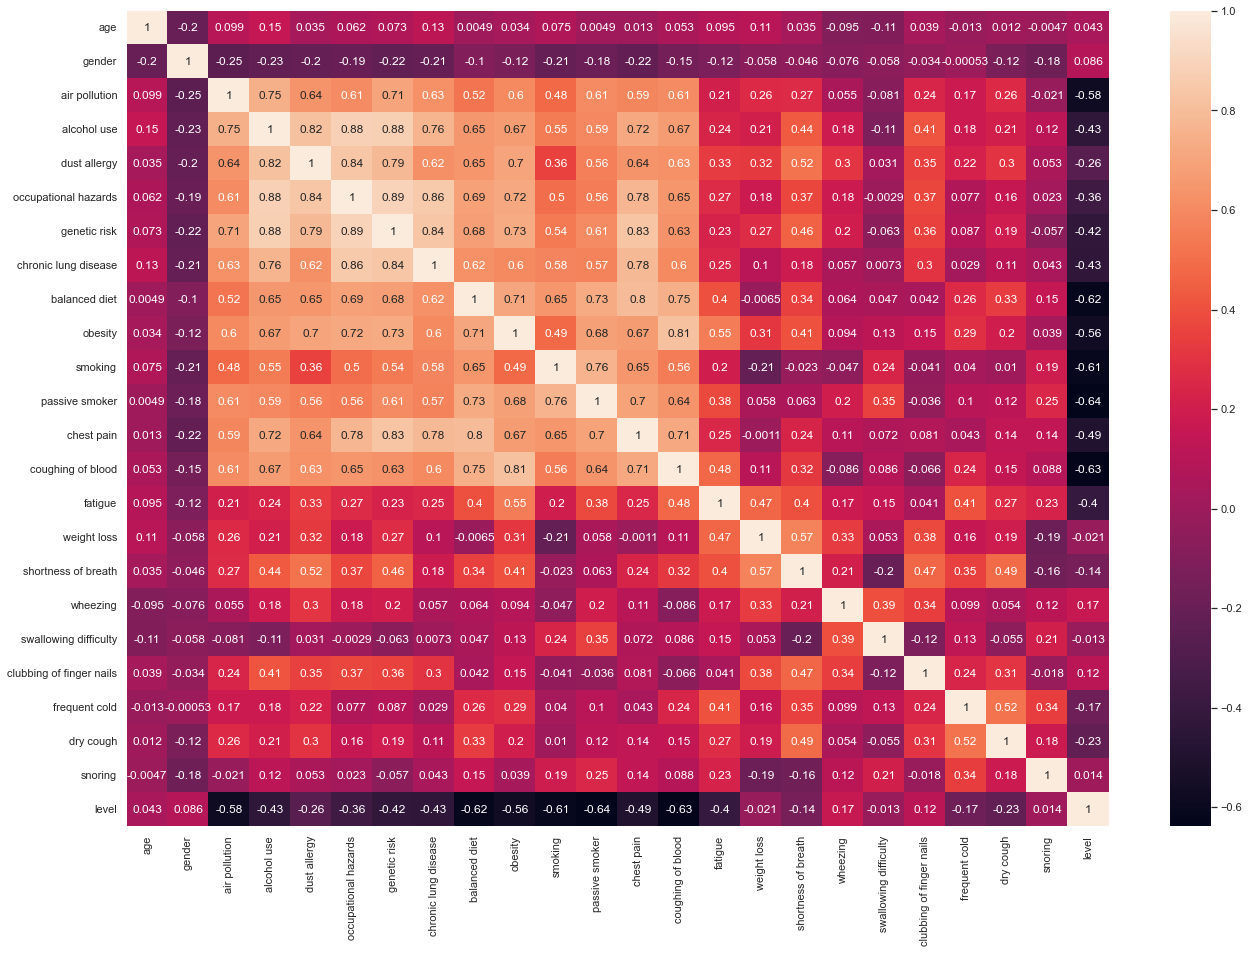

In [66]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(drop_id.corr(), annot=True)
plt.show()

各 level 的數量

<AxesSubplot:xlabel='level', ylabel='count'>

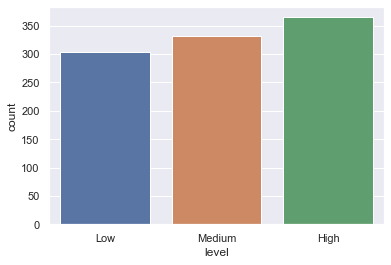

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(x="level", data=drop_id)

air pollution 數量分布，顏色為 level 

<AxesSubplot:xlabel='air pollution', ylabel='count'>

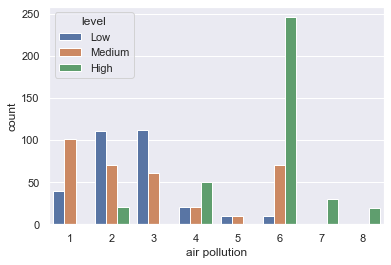

In [21]:
sns.countplot(x='air pollution', hue='level', data=drop_id)

# KMeans

In [58]:
silhouette_avg = []
inertia_list = []
for i in range(2,15):
    kmeans_fit = KMeans(n_clusters = i, init='k-means++', random_state=random_state).fit(drop_id)
    silhouette_avg.append(silhouette_score(drop_id, kmeans_fit.labels_))
    inertia_list.append(kmeans_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

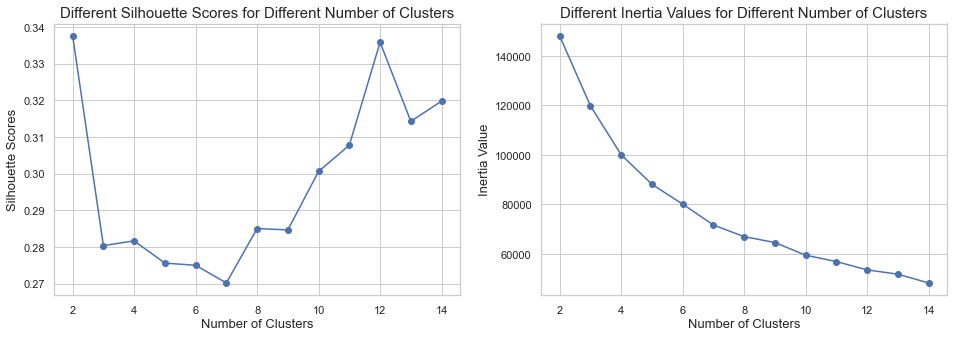

In [59]:
plt.rcParams['figure.figsize'] = [16,5]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.subplot(121)
plt.plot(range(2, 15), silhouette_avg)
plt.scatter(range(2, 15), silhouette_avg)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Silhouette Scores", size=13)
plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

plt.subplot(122)
plt.plot(range(2,15),inertia_list)
plt.scatter(range(2,15),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

選定群數為 12

In [67]:
#Train the Model
kmeans_data=drop_id.copy()
kmeans = KMeans(n_clusters=12, init='k-means++',random_state=random_state).fit(kmeans_data)
kmeans_data['cluster'] = kmeans.labels_

In [68]:
kmeans.inertia_

53515.1749625042

## PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_2D = pca.fit_transform(drop_id)
pca_final = pd.DataFrame(data_2D, columns=['X', 'Y'])
pca_final.head()

,X,Y
0,-4.430990,-5.286940
1,-20.664580,-4.539981
2,-1.797406,3.681554
3,0.334651,8.448772
4,9.297824,7.677500


### PCA + level

In [62]:
level=drop_id['level']
level

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: level, Length: 1000, dtype: int64

In [70]:
level_pred = [pca_final, level]
level_df = pd.concat(level_pred, axis=1)
level_df.head()

,X,Y,level
0,-4.430990,-5.286940,1
1,-20.664580,-4.539981,2
2,-1.797406,3.681554,0
3,0.334651,8.448772,0
4,9.297824,7.677500,0


<AxesSubplot:xlabel='X', ylabel='Y'>

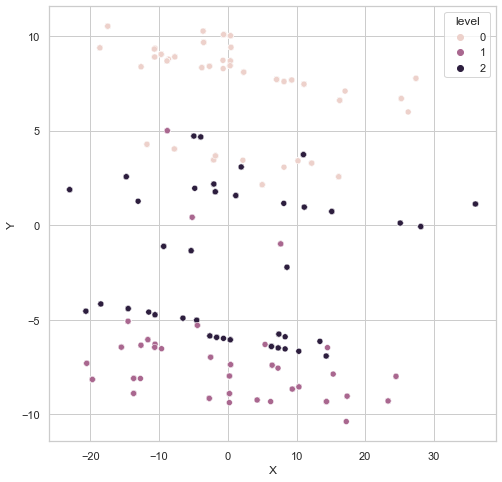

In [71]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', hue='level', data=level_df)

### PCA + level + KMeans

In [69]:
kmeans_cluster=kmeans_data['cluster']
kmeans_cluster

0       0
1       2
2      10
3       7
4       8
       ..
995     8
996     7
997    10
998     4
999    11
Name: cluster, Length: 1000, dtype: int32

In [75]:
kmeans_pred = [level_df, kmeans_cluster]
kmeans_df = pd.concat(kmeans_pred, axis=1)
kmeans_df.head()

,X,Y,level,cluster
0,-4.430990,-5.286940,1,0
1,-20.664580,-4.539981,2,2
2,-1.797406,3.681554,0,10
3,0.334651,8.448772,0,7
4,9.297824,7.677500,0,8


<AxesSubplot:xlabel='X', ylabel='Y'>

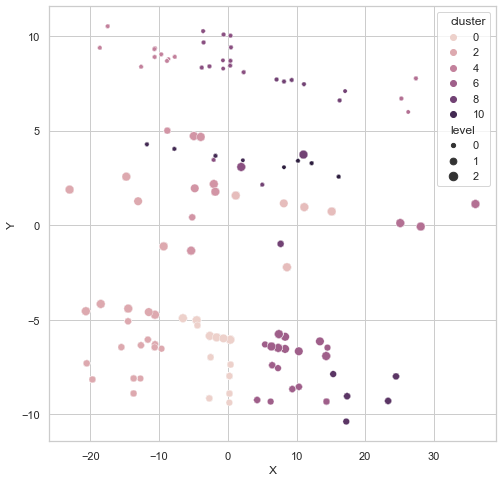

In [79]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', hue='cluster', size=kmeans_df["level"],data=kmeans_df)

顏色代表第 i 群，大小代表 level

# XGBoost

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(drop_id)
data_le['level'] = labelencoder.fit_transform(data_le['level'])
data_le

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [35]:
data_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       1000 non-null   int64
 1   gender                    1000 non-null   int64
 2   air pollution             1000 non-null   int64
 3   alcohol use               1000 non-null   int64
 4   dust allergy              1000 non-null   int64
 5   occupational hazards      1000 non-null   int64
 6   genetic risk              1000 non-null   int64
 7   chronic lung disease      1000 non-null   int64
 8   balanced diet             1000 non-null   int64
 9   obesity                   1000 non-null   int64
 10  smoking                   1000 non-null   int64
 11  passive smoker            1000 non-null   int64
 12  chest pain                1000 non-null   int64
 13  coughing of blood         1000 non-null   int64
 14  fatigue                   1000 non-null  

In [36]:
y=data_le.level

features_all=['age', 'gender', 'air pollution', 'alcohol use', 
'dust allergy', 'occupational hazards', 'genetic risk', 'chronic lung disease',
'balanced diet', 'obesity', 'smoking', 'passive smoker', 'chest pain',
'coughing of blood', 'fatigue', 'weight loss', 'shortness of breath',
'wheezing', 'swallowing difficulty', 'clubbing of finger nails', 'frequent cold', 'dry cough', 'snoring']
X_all =data_le[features_all]

In [37]:
print(sorted(Counter(y).items()))

[(0, 365), (1, 303), (2, 332)]


## train_test_split

In [39]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=random_state)

In [40]:
X_test_all

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,coughing of blood,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring
652,28,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
579,33,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
836,38,1,2,3,5,2,1,1,1,1,...,4,2,1,3,4,6,1,3,2,2
586,42,1,2,4,5,6,5,5,4,6,...,3,8,7,7,3,8,9,1,6,2
226,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,39,1,4,5,6,6,5,4,6,6,...,6,5,3,2,4,3,1,7,5,6
924,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2
609,38,2,5,2,3,1,2,3,5,2,...,3,1,1,1,1,1,3,2,4,2
516,38,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3


## Model

In [45]:
xgb_all = XGBClassifier(learning_rate=0.1,
                      n_estimators=20,           # 树的个数-10棵树建立xgboost
                      max_depth=10,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=42,           # 随机数
                      slient = 0
                    #   use_label_encoder=False,
                    #   eval_metric='mlogloss'
                      )
# xgb_all=XGBClassifier()
xgb_all.fit(X_train_all,y_train_all)

[01:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, slient=0,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [46]:
predicted_all = xgb_all.predict(X_test_all)
predicted_prob_all = xgb_all.predict_proba(X_test_all)

## Result

|high|medium|low|
|-|-|-|
|0|1|2|

Accuracy: 1.0
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



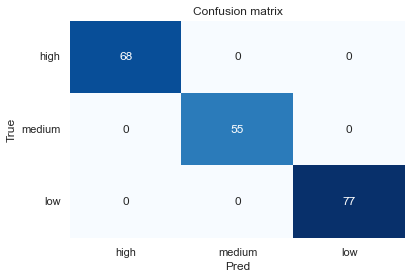

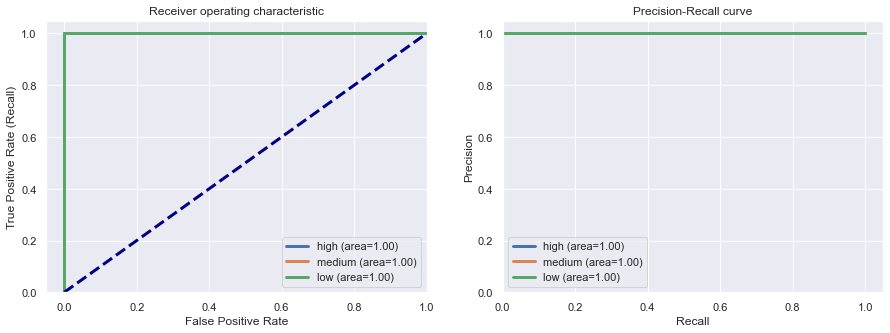

In [50]:
# classes = np.unique(y_test_all)
classes=['high', 'medium', 'low']
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


## Store Model

In [52]:
import pickle
with open('./model/xgboost-lung_cancer.pickle', 'wb') as f:
    pickle.dump(xgb_all, f)

|high|medium|low|
|-|-|-|
|0|1|2|

In [53]:
#讀取Model
with open('./model/xgboost-lung_cancer.pickle', 'rb') as f:
    xgboostModel = pickle.load(f)
    pred=xgboostModel.predict(np.array([[1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1,
                                         1, 1, 1]]))
    print(pred)

[1]
